In [2]:
#add a code that will clean heart rate data before the feature extraction phase.
#https://www.kaggle.com/code/nelsonsharma/ecg-02-ecg-signal-pre-processing
#https://www.kaggle.com/code/bjoernjostein/heart-rate-variability-hrv-analysis
#https://www.kubios.com/blog/preprocessing-of-hrv-data/

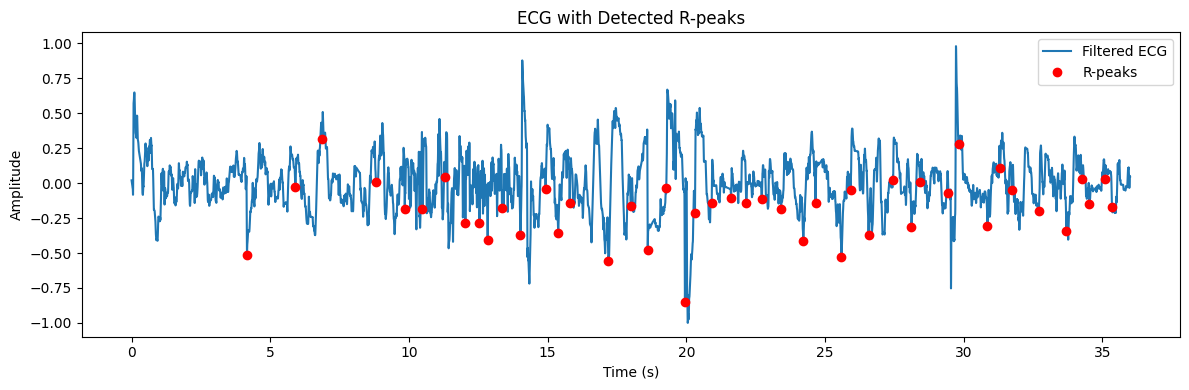

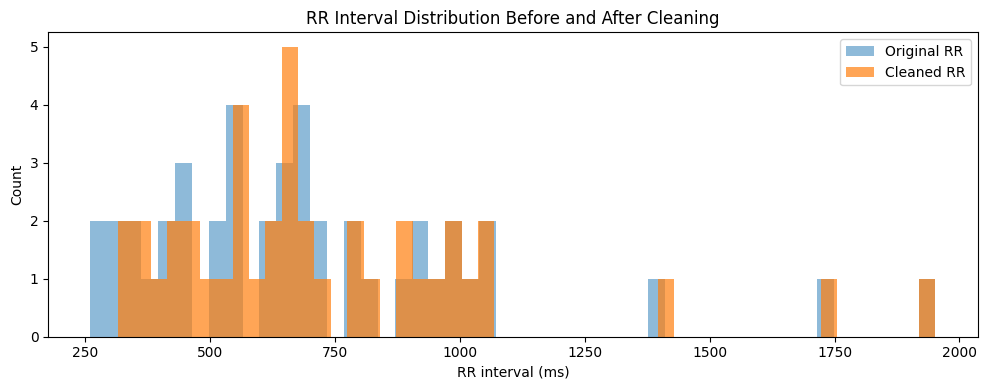

In [39]:
#!pip install --upgrade wfdb  # Uncomment if running for the first time

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from wfdb import processing
import pandas as pd  # Import pandas to read CSV files

# ========= STEP 1: BANDPASS FILTER =========
def bandpass_filter(signal, fs, lowcut=0.5, highcut=50, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# ========= STEP 2: NORMALIZE =========
def normalize_signal(signal):
    return signal / np.max(np.abs(signal))

# ========= STEP 3: R-PEAK DETECTION =========
def detect_r_peaks(filtered_signal, fs):
    r_peaks = processing.gqrs_detect(sig=filtered_signal, fs=fs)
    corrected_r_peaks = processing.correct_peaks(
        sig=filtered_signal, peak_inds=r_peaks,
        search_radius=int(0.1 * fs),  # 100ms search window
        smooth_window_size=int(0.1 * fs)
    )
    return corrected_r_peaks

# ========= STEP 4: RR INTERVALS =========
def compute_rr_intervals(r_peaks, fs):
    rr = np.diff(r_peaks) / fs * 1000  # Convert to milliseconds
    return rr

# ========= STEP 4.5: REMOVE EXTREME RR INTERVALS =========
def remove_extreme_rr_intervals(rr_intervals, low_thresh=300, high_thresh=2000):
    """Remove RR intervals outside a physiological range (default: 300–2000 ms)."""
    clean_rr = rr_intervals[(rr_intervals >= low_thresh) & (rr_intervals <= high_thresh)]
    return clean_rr

# ========= STEP 5: PLOTTING =========
def plot_ecg_with_peaks(signal, r_peaks, fs):
    times = np.arange(len(signal)) / fs
    plt.figure(figsize=(12, 4))
    plt.plot(times, signal, label="Filtered ECG")
    plt.plot(r_peaks / fs, signal[r_peaks], 'ro', label="R-peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("ECG with Detected R-peaks")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_rr_histogram(original_rr, clean_rr):
    plt.figure(figsize=(10, 4))
    plt.hist(original_rr, bins=50, alpha=0.5, label='Original RR')
    plt.hist(clean_rr, bins=50, alpha=0.7, label='Cleaned RR')
    plt.xlabel("RR interval (ms)")
    plt.ylabel("Count")
    plt.title("RR Interval Distribution Before and After Cleaning")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ========= MAIN EXECUTION =========

# Sampling rate (Hz) — update based on your dataset
fs = 250

# Load ECG signal from CSV (assuming no header, skip first row if needed)
df = pd.read_csv('/content/p4_day20160504_part1.csv', header=None, skiprows=1)
ecg = df[2].values.astype(np.float64)  # Extract ECG column and ensure float type

# Apply processing pipeline
filtered = bandpass_filter(ecg, fs)
normalized = normalize_signal(filtered)
r_peaks = detect_r_peaks(normalized, fs)
rr_ms = compute_rr_intervals(r_peaks, fs)
clean_rr_ms = remove_extreme_rr_intervals(rr_ms)

# Plot results
plot_ecg_with_peaks(normalized, r_peaks, fs)
plot_rr_histogram(rr_ms, clean_rr_ms)


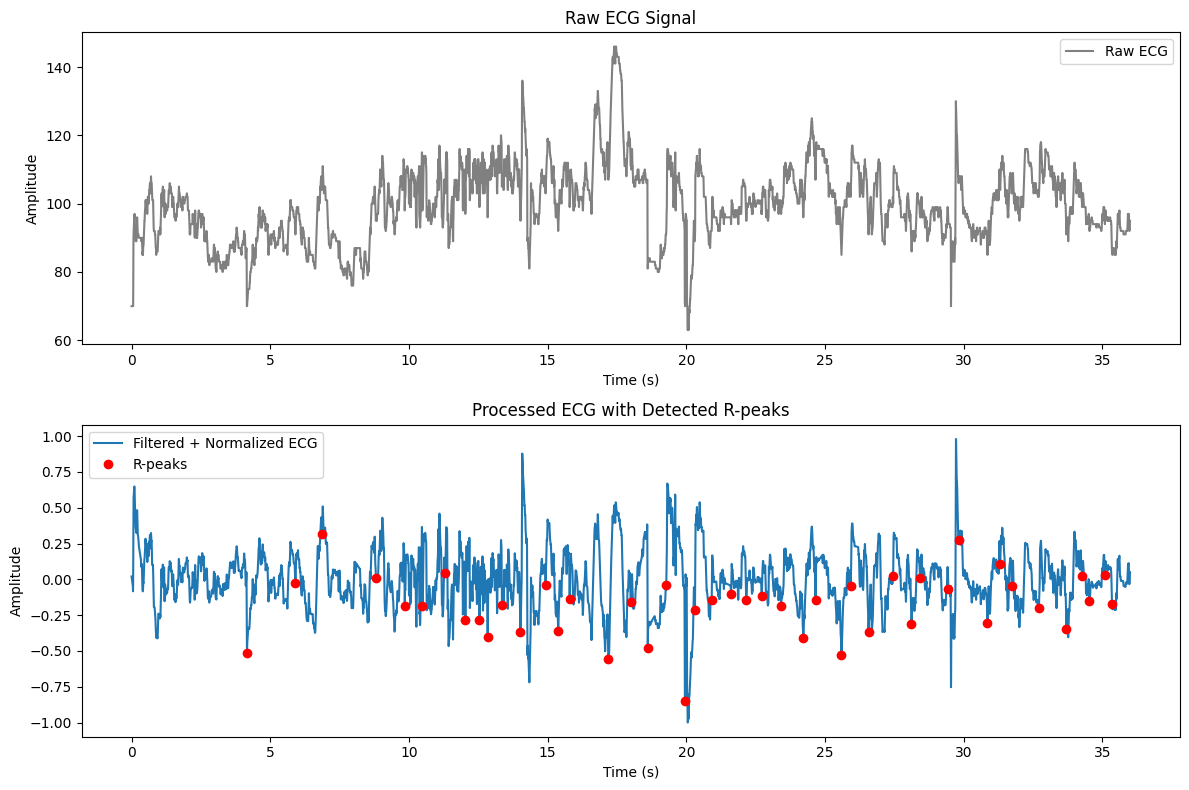

In [40]:
def plot_raw_and_processed_ecg(raw_signal, processed_signal, r_peaks, fs):
    times = np.arange(len(raw_signal)) / fs
    plt.figure(figsize=(12, 8))

    # Plot 1: Raw ECG
    plt.subplot(2, 1, 1)
    plt.plot(times, raw_signal, label="Raw ECG", color='gray')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Raw ECG Signal")
    plt.legend()

    # Plot 2: Filtered & Normalized ECG with R-peaks
    plt.subplot(2, 1, 2)
    plt.plot(times, processed_signal, label="Filtered + Normalized ECG")
    plt.plot(r_peaks / fs, processed_signal[r_peaks], 'ro', label="R-peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Processed ECG with Detected R-peaks")
    plt.legend()

    plt.tight_layout()
    plt.show()
plot_raw_and_processed_ecg(ecg, normalized, r_peaks, fs)

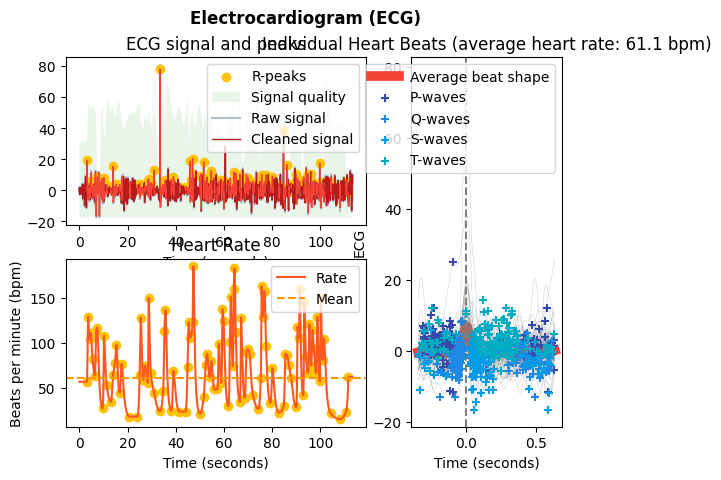

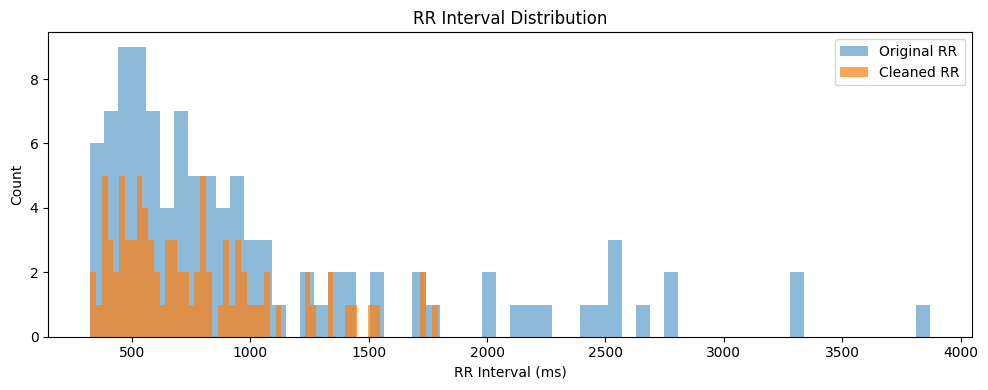

🔹 NeuroKit2 HRV Time-Domain:
    HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  1052.970874  767.334366         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_IQRNN  \
0         NaN         NaN  912.902718  917.397892  ...      728.0   

   HRV_SDRMSSD  HRV_Prc20NN  HRV_Prc80NN  HRV_pNN50  HRV_pNN20  HRV_MinNN  \
0     0.840543        491.2       1479.2  87.378641  91.262136      324.0   

   HRV_MaxNN  HRV_HTI  HRV_TINN  
0     3872.0     20.6   140.625  

[1 rows x 25 columns]
   HRV_ULF  HRV_VLF    HRV_LF    HRV_HF   HRV_VHF    HRV_TP  HRV_LFHF  \
0      NaN      NaN  0.055062  0.043629  0.002048  0.100739  1.262031   

    HRV_LFn   HRV_HFn  HRV_LnHF  
0  0.546577  0.433093 -3.132026  

🔹 pyHRV Time-Domain (Using NeuroKit2 results):
    HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  1052.970874  767.334366         NaN         NaN         NaN         NaN   

   HRV_SD

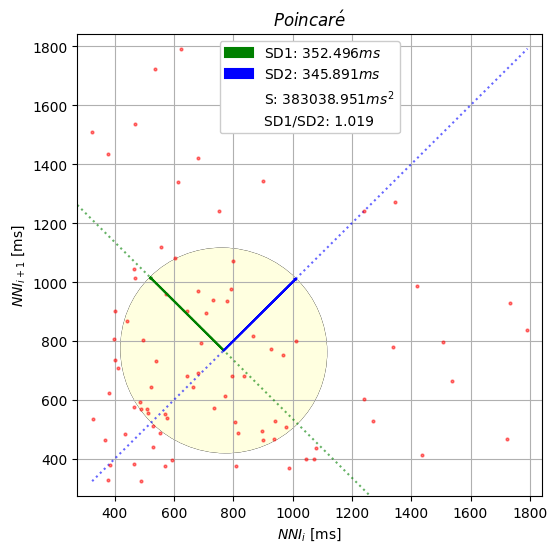

ReturnTuple(poincare_plot=<Figure size 600x600 with 1 Axes>, sd1=np.float64(352.4955825950923), sd2=np.float64(345.8911003858327), sd_ratio=np.float64(0.9812636454600736), ellipse_area=np.float64(383038.95115140296))

In [3]:
#!pip install pyhrv==0.4.1  # Install pyHRV v0.4.1
#!pip install biosppy==0.7.0 # Install a compatible version of biosppy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import pyhrv.time_domain as td
import pyhrv.frequency_domain as fd
import pyhrv.nonlinear as nl
from pyhrv.nonlinear import poincare


# === 1. Load ECG Data ===
fs = 250  # Sampling rate (Hz)
df = pd.read_csv('/content/p4_day20160504_part0.csv', header=None, skiprows=1)
ecg = df[2].values.astype(np.float64)

# === 2. Clean ECG Signal ===
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=fs)

# === 3. Detect R-peaks and Process Signal ===
ecg_signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=fs)
rpeaks = info["ECG_R_Peaks"]
rr_intervals = np.diff(rpeaks) / fs * 1000  # RR intervals in ms

# === 4. Remove Extreme RR Values ===
rr_clean = rr_intervals[(rr_intervals >= 300) & (rr_intervals <= 2000)]

# === 5. Visualize ECG with R-peaks ===
nk.ecg_plot(ecg_signals, info)

# === 6. Visualize RR Distribution ===
plt.figure(figsize=(10, 4))
plt.hist(rr_intervals, bins=60, alpha=0.5, label='Original RR')
plt.hist(rr_clean, bins=60, alpha=0.7, label='Cleaned RR')
plt.xlabel("RR Interval (ms)")
plt.ylabel("Count")
plt.title("RR Interval Distribution")
plt.legend()
plt.tight_layout()
plt.show()

# === 7. HRV Analysis with NeuroKit2 ===
print("🔹 NeuroKit2 HRV Time-Domain:")
hrv_time_results = nk.hrv_time(ecg_signals, sampling_rate=fs)  # Store results
print(hrv_time_results)
print(nk.hrv_frequency(ecg_signals, sampling_rate=fs))

# === 8. HRV Analysis with pyHRV ===
# Convert clean RR intervals to pyHRV-compatible format
rr_list = rr_clean.tolist()

# print("\n🔹 pyHRV Time-Domain:")  # Comment out the pyHRV Time-Domain calculations
# td_results = td.time_domain(rr_list)  # Comment out pyHRV calculation
# print(td_results)  # Comment out to avoid error

# Instead, print NeuroKit2 Time-Domain HRV
print("\n🔹 pyHRV Time-Domain (Using NeuroKit2 results):")
print(hrv_time_results)  # Use results from NeuroKit2


# === 9. Optional: Plot Poincaré ===
print("\n📈 Poincaré plot (pyHRV)")
# Call the 'poincare' function directly
poincare(rr_list, show=True) # poincare function is now imported correctly

352.4955825950923 345.8911003858327 1.7117167615545186


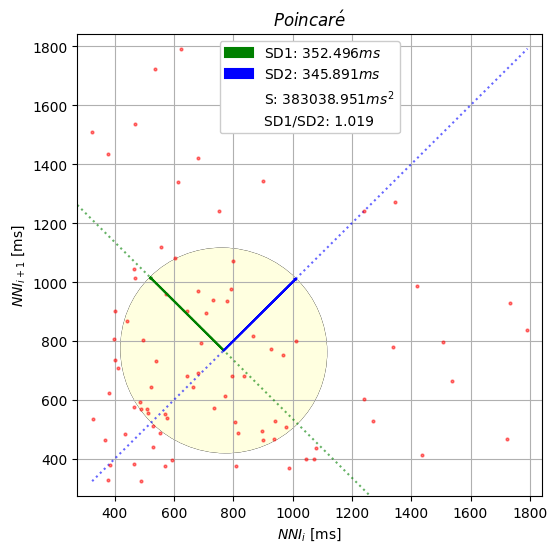

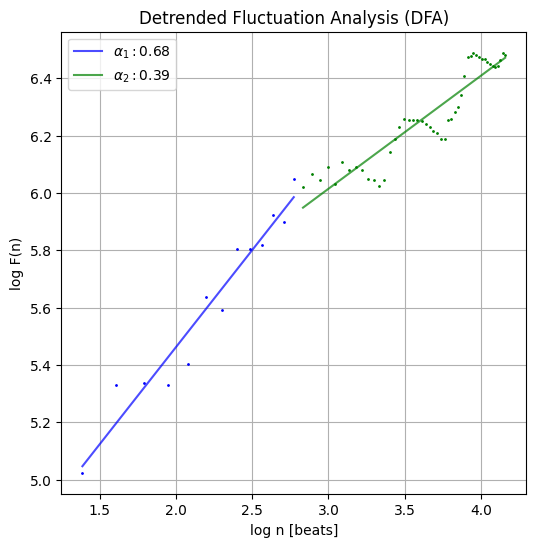

In [5]:
import pyhrv.time_domain as td
import pyhrv.frequency_domain as fd
import pyhrv.nonlinear as nl

# RR in ms as list
rr_list = rr_clean.tolist()

# Non-linear
nl_results = nl.nonlinear(rr_list)

# Access results using keys that are present
# In pyHRV v0.4.1, the keys are 'sd1', 'sd2', and 'sampen'
print(nl_results['sd1'], nl_results['sd2'], nl_results['sampen'])

# Calculate Higuchi Fractal Dimension (HFD) separately if needed
# For pyHRV v0.4.1, you might need to calculate it manually using biosppy
# or another library if it's not directly provided by pyHRV.
# Example using biosppy (if installed):
# from biosppy.signals import tools
# hfd = tools.higuchi_fd(rr_list, kmax=10)  # Adjust kmax as needed
# print("Higuchi FD:", hfd)

In [17]:
def extract_hrv_features(ecg_signal, fs=250):
    import numpy as np
    import neurokit2 as nk
    import pyhrv.time_domain as td
    import pyhrv.frequency_domain as fd
    import pyhrv.nonlinear as nl

    # === Clean ECG and detect R-peaks ===
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=fs)
    _, info = nk.ecg_process(ecg_cleaned, sampling_rate=fs)
    rpeaks = info["ECG_R_Peaks"]

    # === Compute RR intervals (ms) and clean ===
    rr = np.diff(rpeaks) / fs * 1000
    rr_clean = rr[(rr >= 300) & (rr <= 2000)]
    rr_list = rr_clean.tolist()

    # === Time-domain features ===
    mean_rr = np.mean(rr_clean)
    median_rr = np.median(rr_clean)
    sdrr = np.std(rr_clean, ddof=1)
    rmssd = np.sqrt(np.mean(np.square(np.diff(rr_clean))))
    sdsd = np.std(np.diff(rr_clean), ddof=1)
    sdrr_rmssd = sdrr / rmssd if rmssd != 0 else np.nan
    hr = 60000 / mean_rr if mean_rr != 0 else np.nan
    pnn25 = np.sum(np.abs(np.diff(rr_clean)) > 25) / len(rr_clean) * 100
    pnn50 = np.sum(np.abs(np.diff(rr_clean)) > 50) / len(rr_clean) * 100

     # === Nonlinear features (SD1, SD2, SampEn, Higuchi) ===
    nl_results, _ = nl.nonlinear(rr_list)  # Remove this line
    nl_results = nl.nonlinear(rr_list)  # Updated line
    sd1 = nl_results.get("sd1", np.nan)
    sd2 = nl_results.get("sd2", np.nan)
    sampen = nl_results.get("sampen", np.nan)
    higuchi = nl_results.get("higuchi", np.nan)  # This might need to be adjusted based on pyHRV v0.4.1
    kurt = float(nk.stats_kurtosis(rr_clean))
    skew = float(nk.stats_skewness(rr_clean))

    # === Relative RR features ===
    rr_rel = rr_clean / np.mean(rr_clean)
    mean_rel_rr = np.mean(rr_rel)
    median_rel_rr = np.median(rr_rel)
    sdrr_rel_rr = np.std(rr_rel, ddof=1)
    rmssd_rel_rr = np.sqrt(np.mean(np.square(np.diff(rr_rel))))
    sdsd_rel_rr = np.std(np.diff(rr_rel), ddof=1)
    sdrr_rmssd_rel_rr = sdrr_rel_rr / rmssd_rel_rr if rmssd_rel_rr != 0 else np.nan
    kurt_rel_rr = float(nk.stats_kurtosis(rr_rel))
    skew_rel_rr = float(nk.stats_skewness(rr_rel))

    # === Frequency-domain features ===
    freq_results = fd.welch_psd(rr_list, show=False)
    vlf = freq_results['vlf']
    vlf_pct = freq_results['vlf_log']
    lf = freq_results['lf']
    lf_pct = freq_results['lf_log']
    lf_nu = freq_results['lfnu']
    hf = freq_results['hf']
    hf_pct = freq_results['hf_log']
    hf_nu = freq_results['hfnu']
    tp = freq_results['total']
    lf_hf = freq_results['lf_hf']
    hf_lf = 1 / lf_hf if lf_hf != 0 else np.nan

    # === Optional: dataset ID placeholder ===
    dataset_id = None  # You can replace this with a string or index

    # === Final ordered list ===
    features = [
        mean_rr, median_rr, sdrr, rmssd, sdsd, sdrr_rmssd, hr,
        pnn25, pnn50, sd1, sd2, kurt, skew,
        mean_rel_rr, median_rel_rr, sdrr_rel_rr, rmssd_rel_rr, sdsd_rel_rr,
        sdrr_rmssd_rel_rr, kurt_rel_rr, skew_rel_rr,
        vlf, vlf_pct, lf, lf_pct, lf_nu,
        hf, hf_pct, hf_nu, tp, lf_hf, hf_lf,
        sampen, higuchi, dataset_id
    ]

    return features


ValueError: too many values to unpack (expected 2)

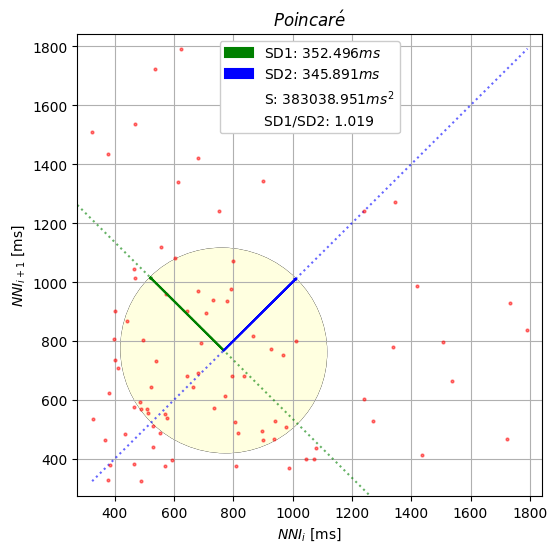

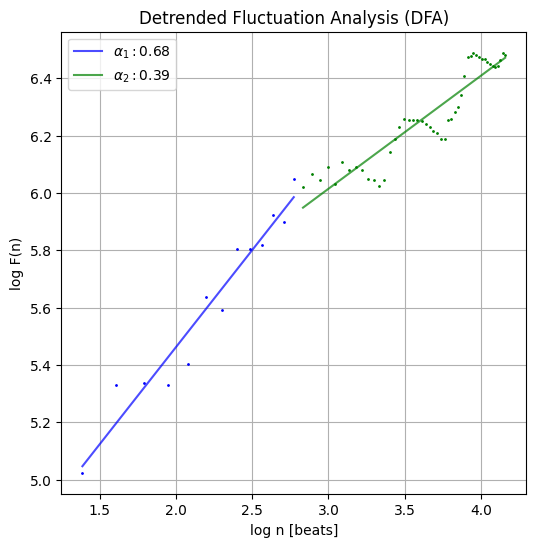

In [18]:
df = pd.read_csv('/content/p4_day20160504_part0.csv', header=None, skiprows=1)
ecg = df[2].values.astype(np.float64)
features = extract_hrv_features(ecg, fs=250)
print(features)


In [19]:
import numpy as np
import neurokit2 as nk
import pyhrv

from pyhrv.frequency_domain import welch_psd
from pyhrv.nonlinear import sample_entropy

def extract_hrv_features(ecg_signal, sampling_rate=250, datasetId=None):
    # 1. R-peak detection using NeuroKit2
    _, rpeaks_info = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate)
    rpeaks = rpeaks_info["ECG_R_Peaks"]  # indices of R-peaks in the signal

    # 2. Compute RR intervals (ms) from consecutive R-peak indices
    rr_intervals = np.diff(rpeaks) / sampling_rate * 1000.0  # convert index difference to milliseconds

    # 3. Remove RR outliers (<300 ms or >2000 ms) to clean artifacts
    rr_intervals = rr_intervals[(rr_intervals >= 300) & (rr_intervals <= 2000)]

    # If not enough intervals remain, you may handle separately (not covered here for brevity)

    # 4. Time-domain features
    # Basic statistics on RR intervals
    mean_rr   = float(np.mean(rr_intervals))
    median_rr = float(np.median(rr_intervals))
    sdrr      = float(np.std(rr_intervals, ddof=0))            # SDNN: std of RR
    # Successive differences of RR intervals
    diff_rr   = np.diff(rr_intervals)
    if diff_rr.size > 0:
        rmssd = float(np.sqrt(np.mean(diff_rr**2)))            # RMSSD
        sdsd  = float(np.std(diff_rr, ddof=0))                 # SDSD
    else:
        rmssd = 0.0
        sdsd  = 0.0
    sdrr_rmssd = float(sdrr / rmssd) if rmssd != 0 else 0.0    # ratio SDNN/RMSSD
    # Heart rate (beats per minute) from mean RR (ms)
    hr = float(0.0 if mean_rr == 0 else (60000.0 / mean_rr))
    # pNN25 and pNN50 (percentage of absolute differences above 25 ms and 50 ms)
    abs_diff_rr = np.abs(diff_rr)
    pnn25 = float(100.0 * np.sum(abs_diff_rr > 25) / abs_diff_rr.size) if abs_diff_rr.size > 0 else 0.0
    pnn50 = float(100.0 * np.sum(abs_diff_rr > 50) / abs_diff_rr.size) if abs_diff_rr.size > 0 else 0.0

    # 5. Poincaré plot features (SD1, SD2) and distribution shape (kurtosis, skewness)
    sd1 = float(sdsd / np.sqrt(2.0))
    sd2 = float(np.sqrt(2.0 * (sdrr**2) - 0.5 * (sdsd**2))) if sdrr >= 0 and sdsd >= 0 else 0.0
    # Kurtosis and skewness of RR intervals
    if rr_intervals.size > 0:
        # Using scipy.stats if available; otherwise, compute manually
        # Here we compute population statistics (Fisher's definition for kurtosis)
        m_rr = mean_rr
        std_rr = np.std(rr_intervals, ddof=0)
        if std_rr == 0:
            kurt = 0.0
            skew = 0.0
        else:
            z_rr = (rr_intervals - m_rr) / std_rr
            kurt = float(np.mean(z_rr**4) - 3)  # excess kurtosis
            skew = float(np.mean(z_rr**3))
    else:
        kurt = 0.0
        skew = 0.0

    # 6. Relative RR interval features (ratio of successive RR intervals)
    if rr_intervals.size > 1:
        rel_rr = rr_intervals[1:] / rr_intervals[:-1]  # ratio of each interval to the previous
    else:
        rel_rr = np.array([])
    if rel_rr.size > 0:
        mean_rel_rr   = float(np.mean(rel_rr))
        median_rel_rr = float(np.median(rel_rr))
        sdrr_rel_rr   = float(np.std(rel_rr, ddof=0))
    else:
        mean_rel_rr = 0.0
        median_rel_rr = 0.0
        sdrr_rel_rr = 0.0
    # Differences of relative RR series
    diff_rel_rr = np.diff(rel_rr)
    if diff_rel_rr.size > 0:
        rmssd_rel_rr = float(np.sqrt(np.mean(diff_rel_rr**2)))
        sdsd_rel_rr  = float(np.std(diff_rel_rr, ddof=0))
    else:
        rmssd_rel_rr = 0.0
        sdsd_rel_rr  = 0.0
    sdrr_rmssd_rel_rr = float(sdrr_rel_rr / rmssd_rel_rr) if rmssd_rel_rr != 0 else 0.0
    # Kurtosis and skewness of relative RR series
    if rel_rr.size > 0:
        m_rel = mean_rel_rr
        std_rel = np.std(rel_rr, ddof=0)
        if std_rel == 0:
            kurt_rel_rr = 0.0
            skew_rel_rr = 0.0
        else:
            z_rel = (rel_rr - m_rel) / std_rel
            kurt_rel_rr = float(np.mean(z_rel**4) - 3)
            skew_rel_rr = float(np.mean(z_rel**3))
    else:
        kurt_rel_rr = 0.0
        skew_rel_rr = 0.0

    # 7. Frequency-domain features using Welch's PSD (pyHRV)
    # Compute PSD and frequency-domain metrics
    fd_res = welch_psd(nni=rr_intervals, show=False, show_param=False)
    # Absolute powers [ms^2] in VLF, LF, HF bands
    vlf, lf, hf = fd_res['fft_abs']
    # Relative powers [% of total power]
    vlf_pct, lf_pct, hf_pct = fd_res['fft_rel']
    # Normalized units (LF, HF)
    lf_nu, hf_nu = fd_res['fft_norm']
    # Total power and LF/HF ratio
    tp = fd_res['fft_total']
    lf_hf = fd_res['fft_ratio']
    hf_lf = float(hf / lf) if lf != 0 else float('inf')

    # 8. Non-linear features: Sample Entropy and Higuchi Fractal Dimension
    sampen_res = sample_entropy(nni=rr_intervals)
    sampen_val = sampen_res['sampen']
    # Higuchi fractal dimension using NeuroKit2
    hfd_val, _ = nk.fractal_higuchi(rr_intervals, show=False)

    # 9. Compile all features into a list in the specified order
    features = [
        mean_rr, median_rr, sdrr, rmssd, sdsd, sdrr_rmssd, hr, pnn25, pnn50,
        sd1, sd2, kurt, skew,
        mean_rel_rr, median_rel_rr, sdrr_rel_rr, rmssd_rel_rr, sdsd_rel_rr, sdrr_rmssd_rel_rr, kurt_rel_rr, skew_rel_rr,
        float(vlf), float(vlf_pct), float(lf), float(lf_pct), float(lf_nu), float(hf), float(hf_pct), float(hf_nu),
        float(tp), float(lf_hf), float(hf_lf),
        float(sampen_val), float(hfd_val),
        datasetId
    ]
    return features


Number of Features: 35
HRV Features:
01: 871.0985915492957
02: 728.0
03: 426.8995710946934
04: 641.8786712233306
05: 641.5880196346994
06: 0.6650782931937632
07: 68.87854093907644
08: 94.28571428571429
09: 92.85714285714286
10: 453.6712394117437
11: 398.3326425643254
12: -0.5177843766641854
13: 0.789560179978205
14: 1.3119412621564515
15: 1.0079396239584697
16: 0.9738075359680932
17: 1.603767407714885
18: 1.6034205434552848
19: 0.6071999788021725
20: 1.1359267847885093
21: 1.3421171747586687
22: 6874.752560931097
23: 4.884905013560094
24: 23534.113546368204
25: 16.722334110709642
26: 17.5811569268723
27: 110325.75497227849
28: 78.39276087573025
29: 82.4188430731277
30: 140734.6210795778
31: 0.21331477452641598
32: 4.687907821763018
33: 1.9459101490553135
34: 2.0766488957796234
35: day20160504
📊 HRV Feature Vector:
MEAN_RR                  : 871.0985915492957
MEDIAN_RR                : 728.0
SDRR                     : 426.8995710946934
RMSSD                    : 641.8786712233306
SDSD  

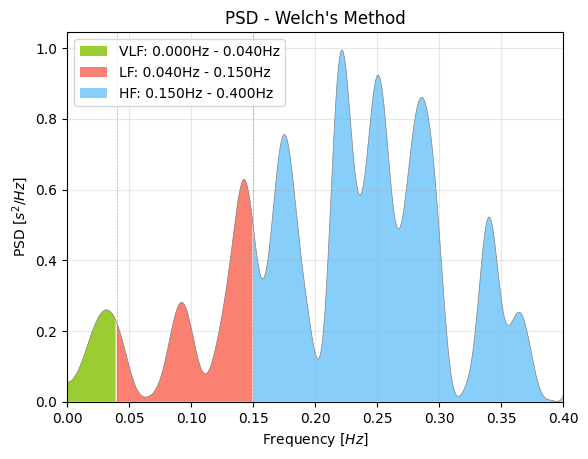

In [23]:
df = pd.read_csv('/content/p4_day20160504_part0.csv', header=None, skiprows=1)

# Assume ECG data is in column index 2 (third column)
ecg = df[2].values.astype(float)

# === Run HRV Feature Extraction ===
features = extract_hrv_features(ecg_signal=ecg, sampling_rate=250, datasetId="day20160504")

# === Print Feature Vector ===
print("Number of Features:", len(features))
print("HRV Features:")
for i, value in enumerate(features):
    print(f"{i+1:02d}: {value}")


# Define the feature names in the correct order
feature_names = [
    "MEAN_RR", "MEDIAN_RR", "SDRR", "RMSSD", "SDSD", "SDRR_RMSSD", "HR",
    "pNN25", "pNN50", "SD1", "SD2", "KURT", "SKEW",
    "MEAN_REL_RR", "MEDIAN_REL_RR", "SDRR_REL_RR", "RMSSD_REL_RR", "SDSD_REL_RR",
    "SDRR_RMSSD_REL_RR", "KURT_REL_RR", "SKEW_REL_RR",
    "VLF", "VLF_PCT", "LF", "LF_PCT", "LF_NU",
    "HF", "HF_PCT", "HF_NU", "TP", "LF_HF", "HF_LF",
    "sampen", "higuci", "datasetId"
]

# Print all features with names
print("📊 HRV Feature Vector:")
for name, value in zip(feature_names, features):
    print(f"{name:25}: {value}")

df_features = pd.DataFrame([features], columns=feature_names)

# Save to CSV
output_path = "/content/p4_hrv_features_day20160504_part1.csv"
df_features.to_csv(output_path, index=False)

print(f"✅ HRV features saved to {output_path}")